In [1]:
import pandas as pd
import numpy as np

In [2]:
loan_train_data = pd.read_csv("train_data.csv")
loan_test_data = pd.read_csv("test_data.csv")

In [3]:
loan_train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# !pip install pandas_profiling
# from pandas_profiling import ProfileReport
# profile = ProfileReport(loan_train_data)
# profile.to_file(output_file = "loan_train.html")

In [6]:
loan_train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_tr_data=loan_train_data.copy()
loan_te_data=loan_test_data.copy()

In [8]:
loan_tr_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
loan_tr_data.shape

(614, 13)

In [10]:
loan_tr_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
loan_tr_data['Loan_Status'].value_counts(normalize=True) # it gives the proportion rather than the numbers.

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

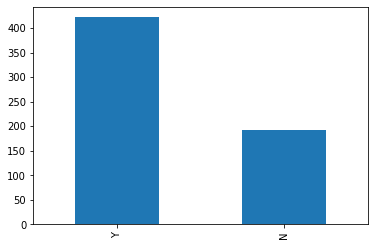

In [12]:
loan_tr_data['Loan_Status'].value_counts().plot.bar()

## Independent Variable(Categorical)

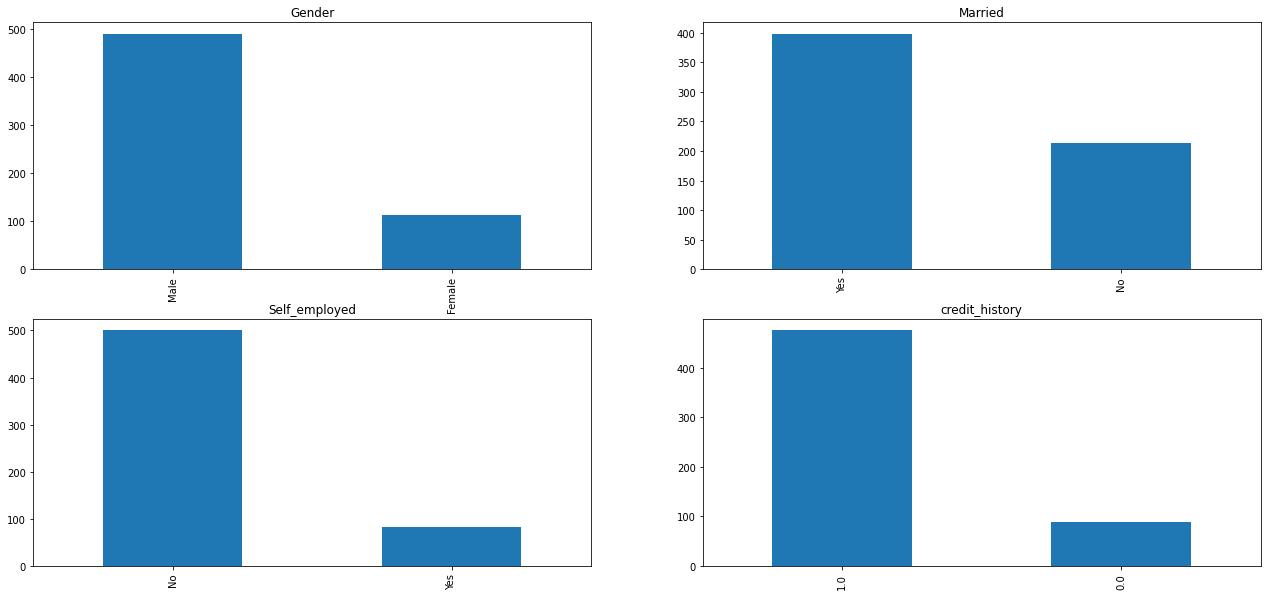

In [13]:
import matplotlib.pyplot as plt
# plt.figure1
plt.subplot(221)
loan_tr_data['Gender'].value_counts().plot.bar(figsize=(22,10), title="Gender")
plt.subplot(222)
loan_tr_data['Married'].value_counts().plot.bar(title="Married")
plt.subplot(223)
loan_tr_data['Self_Employed'].value_counts().plot.bar(title="Self_employed")
plt.subplot(224)
loan_tr_data['Credit_History'].value_counts().plot.bar(title="credit_history")
plt.show()

## Independent Variable (Ordinal)

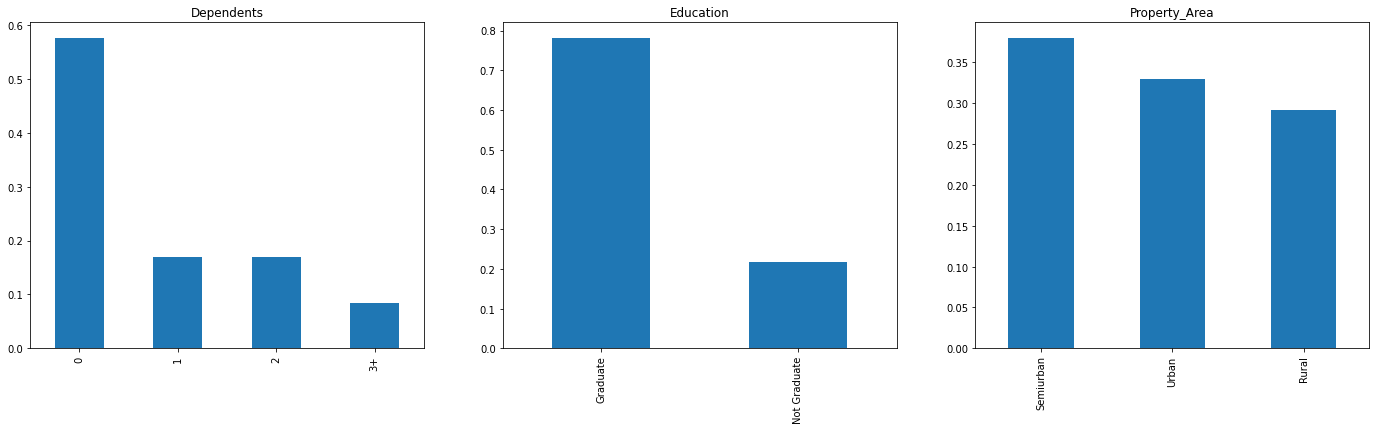

In [14]:
plt.subplot(131)
loan_tr_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
loan_tr_data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
loan_tr_data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

## Independent Variable(Numerical)

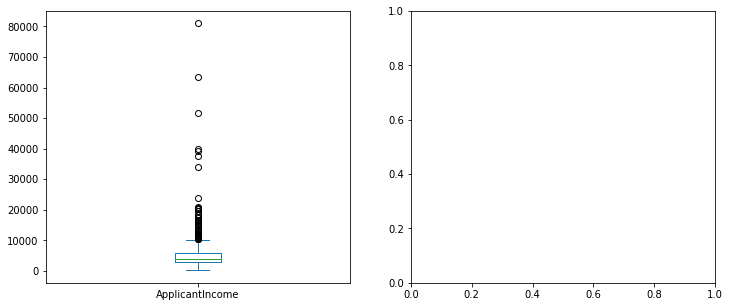

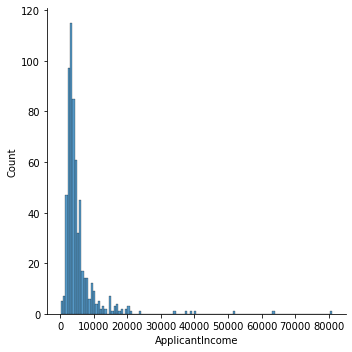

In [15]:
import seaborn as sns
plt.subplot(121)
loan_tr_data['ApplicantIncome'].plot.box(figsize=(12,5));
plt.subplot(122)
sns.displot(loan_tr_data['ApplicantIncome'])  #we can use distplot also

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

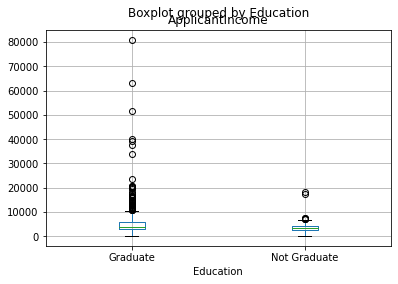

In [16]:
loan_tr_data.boxplot(column='ApplicantIncome', by ='Education')

C:\Program Files\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

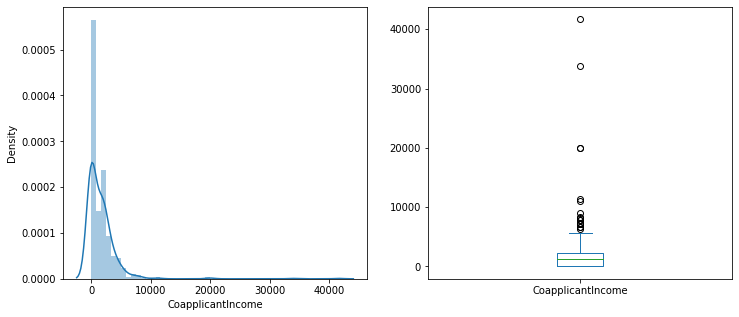

In [17]:
plt.subplot(121)
sns.distplot(loan_tr_data['CoapplicantIncome']);
plt.subplot(122)
loan_tr_data['CoapplicantIncome'].plot.box(figsize=(12,5))

C:\Program Files\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

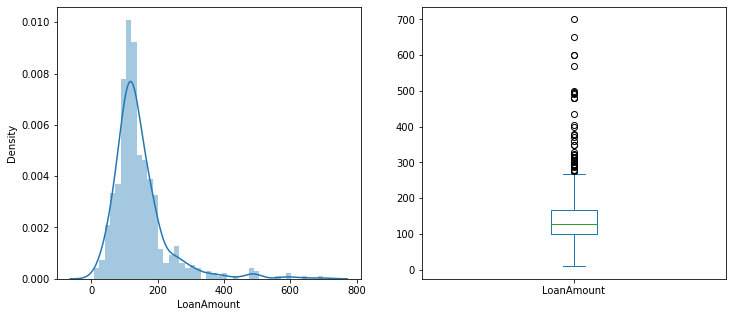

In [18]:
plt.subplot(121)
sns.distplot(loan_tr_data['LoanAmount']);
plt.subplot(122)
loan_tr_data['LoanAmount'].plot.box(figsize=(12,5))

In [19]:
Gender=pd.crosstab(loan_tr_data['Gender'], loan_tr_data['Loan_Status'])
Gender.sum(1)   # sum(1) adds column wise on each row, sum(0) adds rows wise on each column

Gender
Female    112
Male      489
dtype: int64

In [20]:
Gender=pd.crosstab(loan_tr_data['Gender'], loan_tr_data['Loan_Status'], margins=True)
Gender

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


<AxesSubplot:xlabel='Gender'>

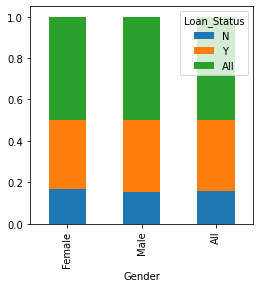

In [21]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Married'>

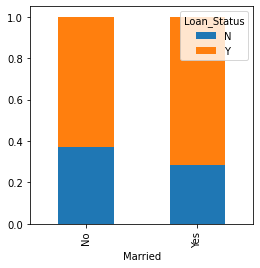

In [22]:
Married = pd.crosstab(loan_tr_data['Married'], loan_tr_data['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Dependents'>

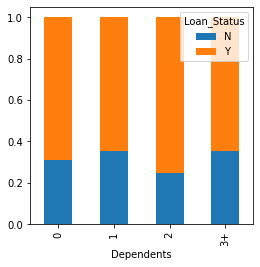

In [23]:
Dependents=pd.crosstab(loan_tr_data['Dependents'],loan_tr_data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Self_Employed'>

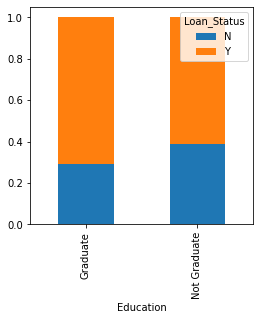

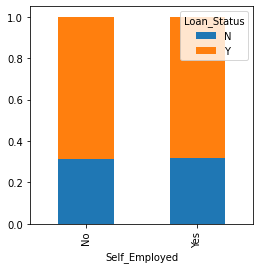

In [24]:

Education=pd.crosstab(loan_tr_data['Education'],loan_tr_data['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Self_Employed=pd.crosstab(loan_tr_data['Self_Employed'],loan_tr_data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))


Text(0, 0.5, 'Percentage')

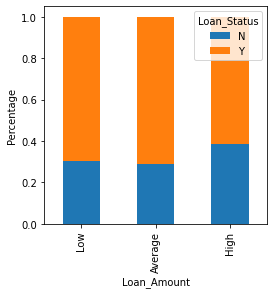

In [25]:
bins=[0,100,200,700]
group=['Low','Average','High']
loan_tr_data['LoanAmount_bin'] = pd.cut(loan_tr_data['LoanAmount'], bins, labels=group)
LoanAmount_bin = pd.crosstab(loan_tr_data['LoanAmount_bin'], loan_tr_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Loan_Amount')
plt.ylabel('Percentage')

<AxesSubplot:xlabel='Property_Area'>

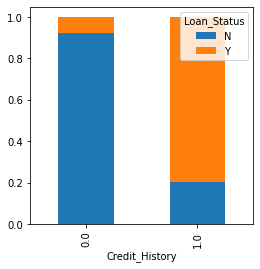

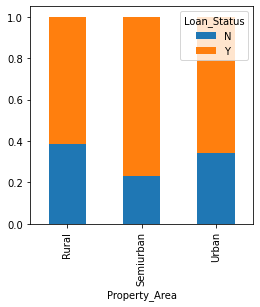

In [26]:
Credit_History = pd.crosstab(loan_tr_data['Credit_History'], loan_tr_data['Loan_Status'])
Property_Area = pd.crosstab(loan_tr_data['Property_Area'], loan_tr_data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Text(0.5, 0, 'Applicant_Income')

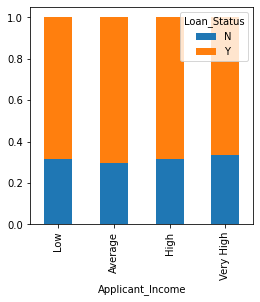

In [27]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
loan_tr_data['Income_bins'] = pd.cut(loan_tr_data['ApplicantIncome'], bins, labels=group) 
Income_bins = pd.crosstab(loan_tr_data['Income_bins'], loan_tr_data['Loan_Status'])
Income_bins.div(Income_bins.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Applicant_Income')

Text(0, 0.5, 'Percentage')

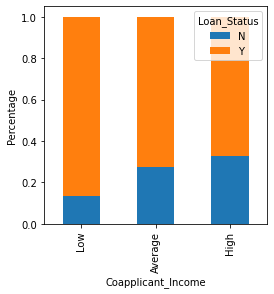

In [28]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
loan_tr_data['Coapplicant_Income_bin'] = pd.cut(loan_tr_data['CoapplicantIncome'], bins, labels=group) 
Coapplicant_Income_bin = pd.crosstab(loan_tr_data['Coapplicant_Income_bin'], loan_tr_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Coapplicant_Income')
plt.ylabel('Percentage')

Text(0.5, 1.0, 'Total income vs % Loan status')

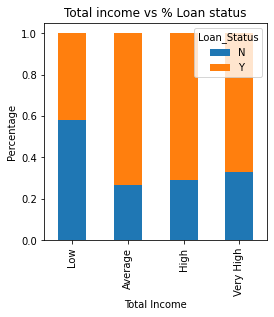

In [29]:
loan_tr_data['Total_Income'] = loan_tr_data['ApplicantIncome']+loan_tr_data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
loan_tr_data['Total_Income_bin'] = pd.cut(loan_tr_data['Total_Income'], bins, labels=group)
Total_Income_bin = pd.crosstab(loan_tr_data['Total_Income_bin'], loan_tr_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.title('Total income vs % Loan status')

Text(0.5, 1.0, 'Loan Amount vs % Loan status')

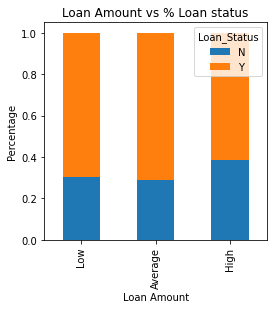

In [30]:
bins=[0,100,200,700]
group=['Low','Average','High']
loan_tr_data['Loan_Amount_bin'] = pd.cut(loan_tr_data['LoanAmount'], bins, labels=group)
Loan_Amount_bin = pd.crosstab(loan_tr_data['Loan_Amount_bin'], loan_tr_data['Loan_Status'])
Loan_Amount_bin.div(Loan_Amount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.title('Loan Amount vs % Loan status')

In [31]:
loan_tr_data.drop(['Loan_Amount_bin', 'Total_Income_bin','Coapplicant_Income_bin', 'Income_bins', 'Total_Income', 'LoanAmount_bin'], axis=1,inplace=True)
loan_tr_data['Dependents'].replace('3+', 3, inplace = True)
loan_te_data['Dependents'].replace('3+', 3, inplace =True)
loan_tr_data['Loan_Status'].replace('Y', 1, inplace=True)
loan_tr_data['Loan_Status'].replace('N', 0, inplace=True)

<AxesSubplot:>

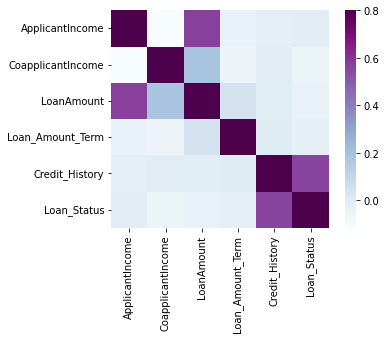

In [32]:
matrix=loan_tr_data.corr()
sns.heatmap(matrix, vmax=0.8 , square=True, cmap="BuPu")

## Missing Value Imputation

In [33]:
loan_tr_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
loan_tr_data1=loan_tr_data.copy()

In [35]:
loan_tr_data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [36]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# my_pipeline = Pipeline([
#     ('Imputer', SimpleImputer(strategy="most_frequent"))
# ])

# index= ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
#        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
#        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
# # x=loan_tr_data1.loc[:,index]
# loan_tr_data2=my_pipeline.fit_transform(loan_tr_data1.loc[:,index])
# x=pd.DataFrame(loan_tr_data2, columns=index)

# y=loan_tr_data1['LoanAmount'].fillna(loan_tr_data1['LoanAmount'].median())
# y.columns='LoanAmount'
# y=pd.DataFrame(y)
# loan_tr_data = pd.concat([x,y],join="outer", axis=1)


## imputation for training data

In [37]:
loan_tr_data['Gender'].fillna(loan_tr_data['Gender'].mode()[0], inplace=True)
loan_tr_data['Married'].fillna(loan_tr_data['Married'].mode()[0], inplace=True)
loan_tr_data['Dependents'].fillna(loan_tr_data['Dependents'].mode()[0], inplace=True)
loan_tr_data['Self_Employed'].fillna(loan_tr_data['Self_Employed'].mode()[0], inplace=True)
loan_tr_data['Loan_Amount_Term'].fillna(loan_tr_data['Loan_Amount_Term'].mode()[0], inplace=True)
loan_tr_data['Credit_History'].fillna(loan_tr_data['Credit_History'].mode()[0], inplace=True)
loan_tr_data['LoanAmount'].fillna(loan_tr_data['LoanAmount'].median(), inplace=True)

## imputation for test data

In [38]:
loan_te_data['Gender'].fillna(loan_tr_data['Gender'].mode()[0], inplace=True)
loan_te_data['Dependents'].fillna(loan_tr_data['Dependents'].mode()[0], inplace=True)
loan_te_data['Self_Employed'].fillna(loan_tr_data['Self_Employed'].mode()[0], inplace=True)
loan_te_data['Loan_Amount_Term'].fillna(loan_tr_data['Loan_Amount_Term'].mode()[0], inplace=True)
loan_te_data['Credit_History'].fillna(loan_tr_data['Credit_History'].mode()[0], inplace=True)
loan_te_data['LoanAmount'].fillna(loan_tr_data['LoanAmount'].median(), inplace=True)

In [39]:
loan_te_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Removing The outliers by log transformation

<AxesSubplot:>

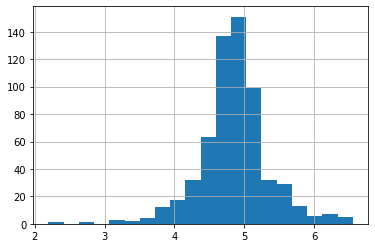

In [40]:
loan_tr_data['LoanAmount_log'] = np.log(loan_tr_data['LoanAmount'])
loan_tr_data['LoanAmount_log'].hist(bins=20)

In [41]:
loan_te_data['LoanAmount_log'] = np.log(loan_te_data['LoanAmount'])


In [42]:
loan_te_data_original=loan_te_data.copy()

## drop unnecessary columns

In [43]:
loan_tr_data=loan_tr_data.drop('Loan_ID', axis=1)
loan_te_data=loan_te_data.drop('Loan_ID', axis=1)
# loan_tr_data=loan_tr_data.drop('LoanAmount', axis=1)
# loan_te_data=loan_te_data.drop('LoanAmount', axis=1)

In [44]:
X=loan_tr_data.drop('Loan_Status', axis=1)
Y = loan_tr_data.Loan_Status

We can't put get_dummies directly to the datasets, because it will also categories those numerical data as well. Thus you might see hugh number of columns.

## Binning for training datasets

In [45]:
# bins=[0,2500,4000,6000,81000]
# group=['Low','Average','High','Very High']
# loan_tr_data['ApplicantIncome'] = pd.cut(loan_tr_data['ApplicantIncome'], bins, labels=group )

# bins=[0,1000,3000,42000]
# group=['Low','Average','High']
# loan_tr_data['CoapplicantIncome']= pd.cut(loan_tr_data['CoapplicantIncome'], bins, labels=group, include_lowest=True )
# # loan_tr_data['CoapplicantIncome'].fillna("", inplace=True)

# bins=[0,180,300,480]
# group=['Low','Average','High']
# loan_tr_data['Loan_Amount_Term']= pd.cut(loan_tr_data['Loan_Amount_Term'], bins, labels=group )

# group=['Low','Average','High','Very High']   # I have done quartile binning.Because this column was normally distributed and i have to cut it equally. 
# loan_tr_data['LoanAmount_log']=pd.qcut(loan_tr_data['LoanAmount_log'],4,labels=group)

# loan_tr_data=loan_tr_data.drop(['LoanAmount'], axis=1)

## Outliers and Binning for test Datasets

In [46]:
# loan_te_data['LoanAmount_log'] = np.log(loan_te_data['LoanAmount'])

# bins=[0,2500,4000,6000,81000]
# group=['Low','Average','High','Very High']
# loan_te_data['ApplicantIncome'] = pd.cut(loan_te_data['ApplicantIncome'], bins, labels=group )

# bins=[0,1000,3000,42000]
# group=['Low','Average','High']
# loan_te_data['CoapplicantIncome']= pd.cut(loan_te_data['CoapplicantIncome'], bins, labels=group, include_lowest=True )
# # loan_tr_data['CoapplicantIncome'].fillna("", inplace=True)

# bins=[0,180,300,480]
# group=['Low','Average','High']
# loan_te_data['Loan_Amount_Term']= pd.cut(loan_te_data['Loan_Amount_Term'], bins, labels=group )

# group=['Low','Average','High','Very High']   # I have done quartile binning.Because this column was normally distributed and i have to cut it equally. 
# loan_te_data['LoanAmount_log']=pd.qcut(loan_te_data['LoanAmount_log'],4,labels=group)

# loan_te_data=loan_te_data.drop(['LoanAmount'], axis=1)

In [47]:
# X[['ApplicantIncome','CoapplicantIncome']]=X[['ApplicantIncome','CoapplicantIncome']].apply(pd.to_numeric)
X=pd.get_dummies(X)                  
loan_te_data=pd.get_dummies(loan_te_data)

In [48]:
loan_te_data.dtypes

ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
LoanAmount_log             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_3                 uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [49]:
X.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
LoanAmount_log             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_3                 uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size=0.3)

In [51]:
y_cv.info()

<class 'pandas.core.series.Series'>
Int64Index: 185 entries, 486 to 274
Series name: Loan_Status
Non-Null Count  Dtype
--------------  -----
185 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# model=LogisticRegression()
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1,max_iter=100, 
                           multi_class='ovr', n_jobs=1, penalty='l2', random_state=1, solver='liblinear', tol=0.0001, 
                          verbose=0, warm_start=False)
# y_train=y_train.astype("int64")
model=model.fit(x_train,y_train)


In [53]:
model.score(x_train,y_train)

0.8088578088578089

In [54]:
x_train.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
LoanAmount_log             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_3                 uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [55]:
pred_cv=model.predict(x_cv)
accuracy_score(y_cv,pred_cv)


0.827027027027027

## Model Testing on Test Data sets

In [56]:
pred_test = model.predict(loan_te_data)

In [57]:
submission=pd.DataFrame()
submission['Loan_ID'] = loan_te_data_original['Loan_ID'].copy()
submission['Loan_Status'] = pred_test


In [58]:
submission['Loan_Status'].replace(1,'Y', inplace=True)
submission['Loan_Status'].replace(0,'N', inplace=True)

In [59]:
submission.value_counts('Loan_Status')

Loan_Status
Y    305
N     62
dtype: int64

In [60]:
# submission.to_csv('logistic.csv')

## Cross Validation

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from statistics import mean
from sklearn import metrics

In [62]:
i=1
accuracy_sr=[]
skf=StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
for train_index,test_index in skf.split(X,Y):
    print('\n{} of kfold {}'.format(i, skf.n_splits))
    xtr,xvl=X.iloc[train_index], X.iloc[test_index]
    ytr,yvl=Y.iloc[train_index], Y.iloc[test_index]
    model=LogisticRegression(random_state=1, max_iter=100)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy score ',score)
    i+=1
    accuracy_sr.append(score)

print('\nmean of accuracy score is ',mean(accuracy_sr))


1 of kfold 5
accuracy score  0.8048780487804879

2 of kfold 5
accuracy score  0.8373983739837398

3 of kfold 5
accuracy score  0.7804878048780488

4 of kfold 5
accuracy score  0.7886178861788617

5 of kfold 5
accuracy score  0.7950819672131147

mean of accuracy score is  0.8012928162068506


C:\Users\DEV\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DEV\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

auc value is:  0.7349624060150376


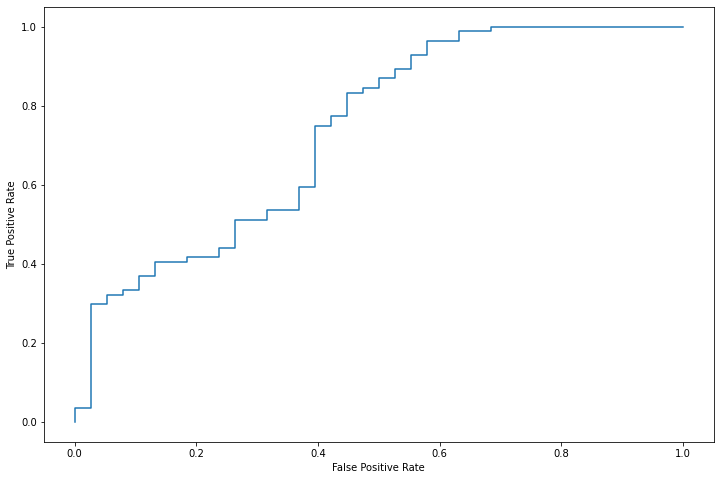

In [63]:
pred_test=model.predict(loan_te_data)
pred=model.predict_proba(xvl)[:,1]

fpr,tpr,_=metrics.roc_curve(yvl, pred) # here ,_ tells about ignore all other returned varibles just give me fpr,tpr.
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label=" validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('auc value is: ',str(auc))

In [64]:
# for _ in range(10):     
#     print('do_something()')

In [65]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=loan_te_data_original['Loan_ID'].copy()

In [66]:
submission['Loan_Status'].replace(1,'Y', inplace=True)
submission['Loan_Status'].replace(0,'N', inplace=True)

In [67]:
submission.to_csv("logistic_kfold.csv")

## Feature Engineering

1. Total Income
2. EMI
3. Balance Income

In [68]:
X['Total_Income']=X['ApplicantIncome']+X['CoapplicantIncome']
loan_te_data['Total_Income']=loan_te_data['ApplicantIncome']+loan_te_data['CoapplicantIncome']

C:\Program Files\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

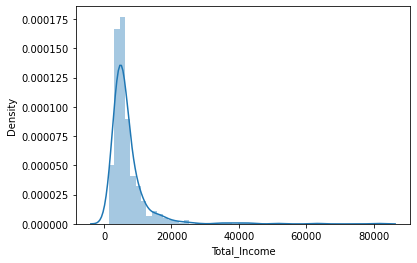

In [69]:
sns.distplot(X['Total_Income'])

In [70]:
X['Total_Income_log']= np.log(X['Total_Income'])
loan_te_data['Total_Income_log']=np.log(loan_te_data['Total_Income'])

C:\Program Files\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

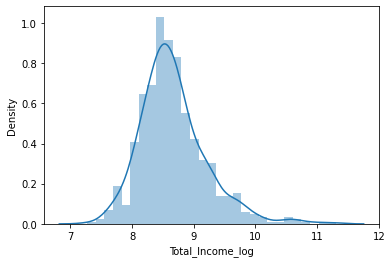

In [71]:
sns.distplot(X['Total_Income_log'])

In [72]:
X.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log
0,5849,0.0,128.0,360.0,1.0,4.85203,0,1,1,0,...,0,1,0,1,0,0,0,1,5849.0,8.674026
1,4583,1508.0,128.0,360.0,1.0,4.85203,0,1,0,1,...,0,1,0,1,0,1,0,0,6091.0,8.714568


C:\Program Files\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EMI', ylabel='Density'>

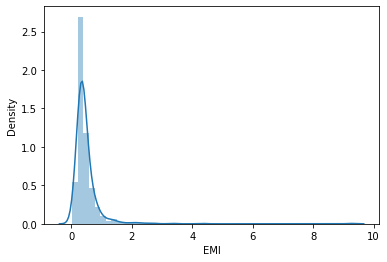

In [73]:
X['EMI']=X['LoanAmount']/X['Loan_Amount_Term']
loan_te_data['EMI']=loan_te_data['LoanAmount']/loan_te_data['Loan_Amount_Term']
sns.distplot(X['EMI'])

C:\Program Files\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


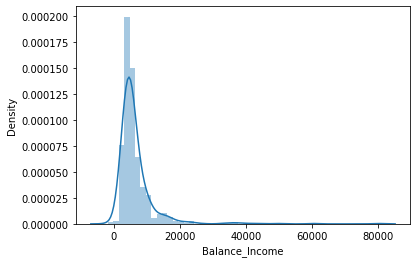

In [74]:
X['Balance_Income'] = X['Total_Income']-(X['EMI']*1000)
loan_te_data['Balance_Income'] = loan_te_data['Total_Income']-(loan_te_data['EMI']*1000)
sns.distplot(X['Balance_Income']);

In [75]:
X=X.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)
loan_te_data=loan_te_data.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)

In [76]:
X.head()

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income
0,1.0,4.852030,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,4.852030,0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,4.189655,0,1,0,1,0,1,0,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,4.787492,0,1,0,1,0,1,0,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,4.948760,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


## Application of Different Models


1. LogisticRegression
2. RandomForest
3. DecisionTree
4. XGBoost

In [77]:
#LogisticRegression
i=1
accuracy_sr=[]
skf=StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
for train_index,test_index in skf.split(X,Y):
    print('\n{} of kfold {}'.format(i, skf.n_splits))
    xtr,xvl=X.iloc[train_index], X.iloc[test_index]
    ytr,yvl=Y.iloc[train_index], Y.iloc[test_index]
    model=LogisticRegression(random_state=1, max_iter=100)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy score ',score)
    i+=1
    accuracy_sr.append(score)

print('\nmean of accuracy score is ',mean(accuracy_sr))




1 of kfold 5
accuracy score  0.7886178861788617

2 of kfold 5
accuracy score  0.6910569105691057

3 of kfold 5
accuracy score  0.6666666666666666

4 of kfold 5
accuracy score  0.7804878048780488

5 of kfold 5
accuracy score  0.680327868852459

mean of accuracy score is  0.7214314274290283


In [88]:
pred_test=model.predict(loan_te_data)
pred=model.predict_proba(xvl)[:,1]

submission['Loan_Status']=pred_test
submission['Loan_ID']=loan_te_data_original['Loan_ID'].copy()

submission['Loan_Status'].replace(1,'Y', inplace=True)
submission['Loan_Status'].replace(0,'N', inplace=True)

submission.to_csv("log2.csv", index=False)

In [79]:
# Decision Tree

from sklearn import tree
i=1
accuracy_sr=[]
skf=StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
for train_index,test_index in skf.split(X,Y):
    print('\n{} of kfold {}'.format(i, skf.n_splits))
    xtr,xvl=X.iloc[train_index], X.iloc[test_index]
    ytr,yvl=Y.iloc[train_index], Y.iloc[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy score ',score)
    i+=1
    accuracy_sr.append(score)

print('\nmean of accuracy score is ',mean(accuracy_sr))


1 of kfold 5
accuracy score  0.7398373983739838

2 of kfold 5
accuracy score  0.6991869918699187

3 of kfold 5
accuracy score  0.7560975609756098

4 of kfold 5
accuracy score  0.7073170731707317

5 of kfold 5
accuracy score  0.6721311475409836

mean of accuracy score is  0.7149140343862455


In [87]:
pred_test=model.predict(loan_te_data)
pred=model.predict_proba(xvl)[:,1]

submission['Loan_Status']=pred_test
submission['Loan_ID']=loan_te_data_original['Loan_ID'].copy()

submission['Loan_Status'].replace(1,'Y', inplace=True)
submission['Loan_Status'].replace(0,'N', inplace=True)

submission.to_csv("Decision tree.csv", index=False)

In [81]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

i=1
accuracy_sr=[]
skf=StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
for train_index,test_index in skf.split(X,Y):
    print('\n{} of kfold {}'.format(i, skf.n_splits))
    xtr,xvl=X.iloc[train_index], X.iloc[test_index]
    ytr,yvl=Y.iloc[train_index], Y.iloc[test_index]
    model=RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy score ',score)
    i+=1
    accuracy_sr.append(score)

print('\nmean of accuracy score is ',mean(accuracy_sr))


1 of kfold 5
accuracy score  0.8292682926829268

2 of kfold 5
accuracy score  0.8130081300813008

3 of kfold 5
accuracy score  0.7723577235772358

4 of kfold 5
accuracy score  0.8048780487804879

5 of kfold 5
accuracy score  0.7540983606557377

mean of accuracy score is  0.7947221111555378


In [85]:
pred_test=model.predict(loan_te_data)
pred=model.predict_proba(xvl)[:,1]

submission['Loan_Status']=pred_test
submission['Loan_ID']=loan_te_data_original['Loan_ID'].copy()

submission['Loan_Status'].replace(1,'Y', inplace=True)
submission['Loan_Status'].replace(0,'N', inplace=True)

submission.to_csv("Random Forest.csv", index=False)

In [83]:
# XGBoost
from xgboost import XGBClassifier

i=1
accuracy_sr=[]
skf=StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
for train_index,test_index in skf.split(X,Y):
    print('\n{} of kfold {}'.format(i, skf.n_splits))
    xtr,xvl=X.iloc[train_index], X.iloc[test_index]
    ytr,yvl=Y.iloc[train_index], Y.iloc[test_index]
    model=XGBClassifier(n_estimator=50, max_depth=4)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy score ',score)
    i+=1
    accuracy_sr.append(score)

print('\nmean of accuracy score is ',mean(accuracy_sr))


1 of kfold 5
[20:39:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


accuracy score  0.7642276422764228

2 of kfold 5
[20:39:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


accuracy score  0.7317073170731707

3 of kfold 5
[20:39:09] WARNING: C:/Users/Administrator/works

In [86]:
pred_test=model.predict(loan_te_data)
pred=model.predict_proba(xvl)[:,1]

submission['Loan_Status']=pred_test
submission['Loan_ID']=loan_te_data_original['Loan_ID'].copy()

submission['Loan_Status'].replace(1,'Y', inplace=True)
submission['Loan_Status'].replace(0,'N', inplace=True)

submission.to_csv("XGBoost.csv", index=False)